In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [3]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

In [4]:
dataset_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
dataset_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
testset = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
testset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
#shows all the sum of null rows in each columns
dataset_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
#Drop Id columsn as no need for unique keys while training the model 
dataset_df = dataset_df.drop("Id", axis=1)
dataset_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## "Saleprice" Distribution

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/tmp/ipykernel_30/3033967837.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.4}); #bins= no. of bars , hist_kws = transparency of the bars
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


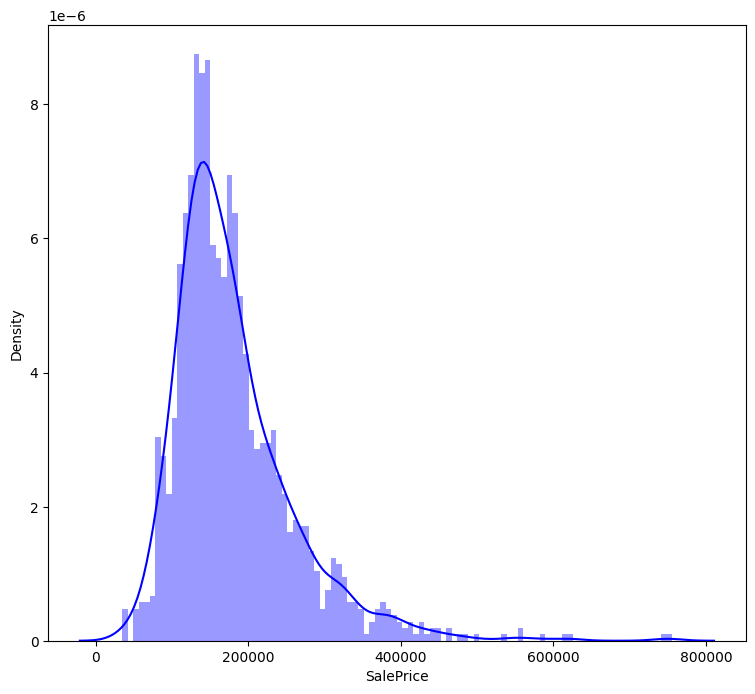

In [8]:
print(dataset_df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
#use Seaborn to plot histograms and kde on it for a smother graph 
sns.distplot(dataset_df['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.4}); #bins= no. of bars , hist_kws = transparency of the bars 

## Numeric features

In [9]:
# get all the features with the numeric data type to check for correlation
numeric_features = dataset_df.select_dtypes(include=[np.number])
# show all the cloumns with numeric data type
numeric_features.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [10]:
#And if we want to do it for object features like string data type
categorical_features = dataset_df.select_dtypes(include=[np.object_])
#categorial columns
categorical_features.columns
#we will not use this however as there is no correlation here between these string data types 

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

## Correlation

In [11]:
# computes the pairwise correlation of all the numeric columns in the DataFrame (numeric_features)
correlation = numeric_features.corr() #.corr() provides a correlation Matrix
#print the correlation features but towards "SalePrice"
print(correlation['SalePrice'].sort_values(ascending = False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


<Axes: title={'center': 'Correlation of Numeric Features'}>

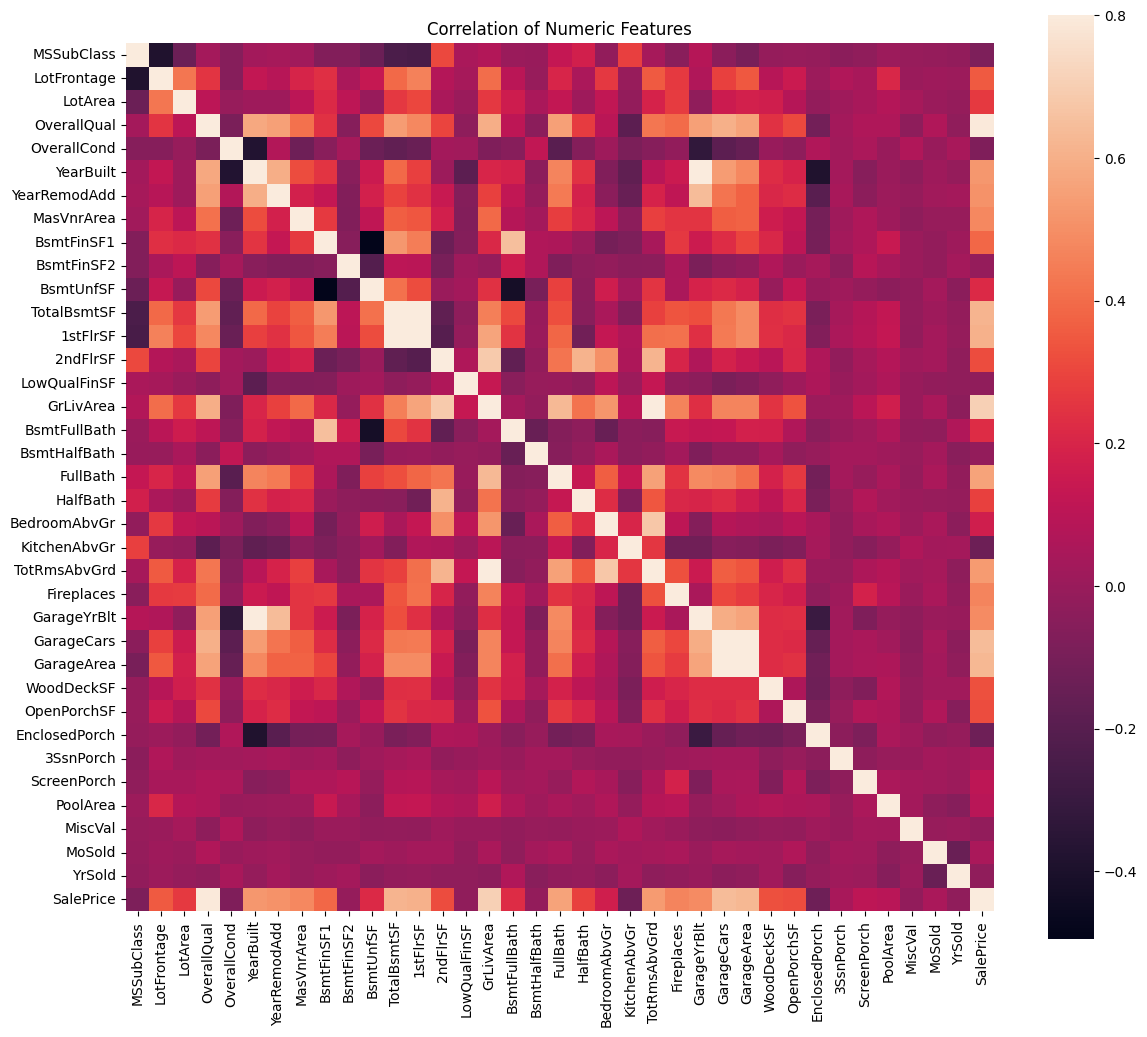

In [12]:

f, ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Numeric Features')

#use Seaborn library for heatmap 
sns.heatmap(correlation,square = True, vmax=0.8) #Heat map correlation for all numeric features with each other

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


<Axes: >

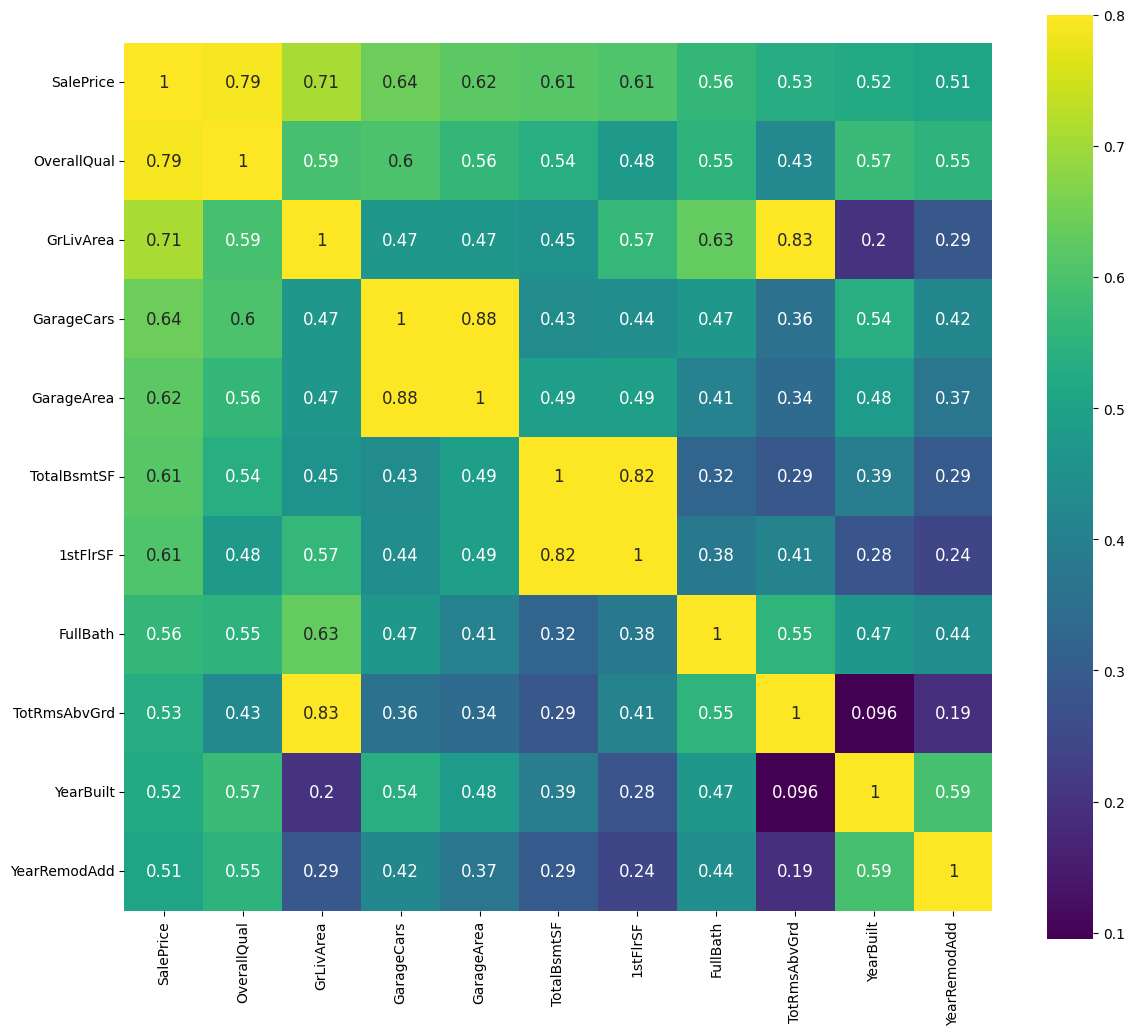

In [13]:
#num of columns will be used later
k=11
#getting the (highest k columns values, and SalePrice) columns with correlation towards SalePrice 
cols = correlation.nlargest(k,"SalePrice")["SalePrice"].index
print(cols)

#Unlike the previous heatmap we didnt use "correlation = numeric_features.corr()", where corr() provides a Correlation Matrix
#But since we are using a cols which just gives us the name columns (array of columns names) we need to build it as a Correlation Matrix 
#So we use np.corrceof(<dataset>[<list or array>].values.T)
#Here .values extraxt the values from the dataset, .T tranposes the matrix
cm = np.corrcoef(dataset_df[cols].values.T)

f,ax = plt.subplots(figsize= (14,12))

sns.heatmap(cm,square = True, vmax = 0.8,
            annot = True, cmap = 'viridis', linecolor = "white", # annot =  shows value in squares, cmap = colormap
            xticklabels = cols.values, yticklabels = cols.values,# Labelling the X and Y axis
            annot_kws = {'size':12}) #size of the values in the annot

## All numeric data distribution

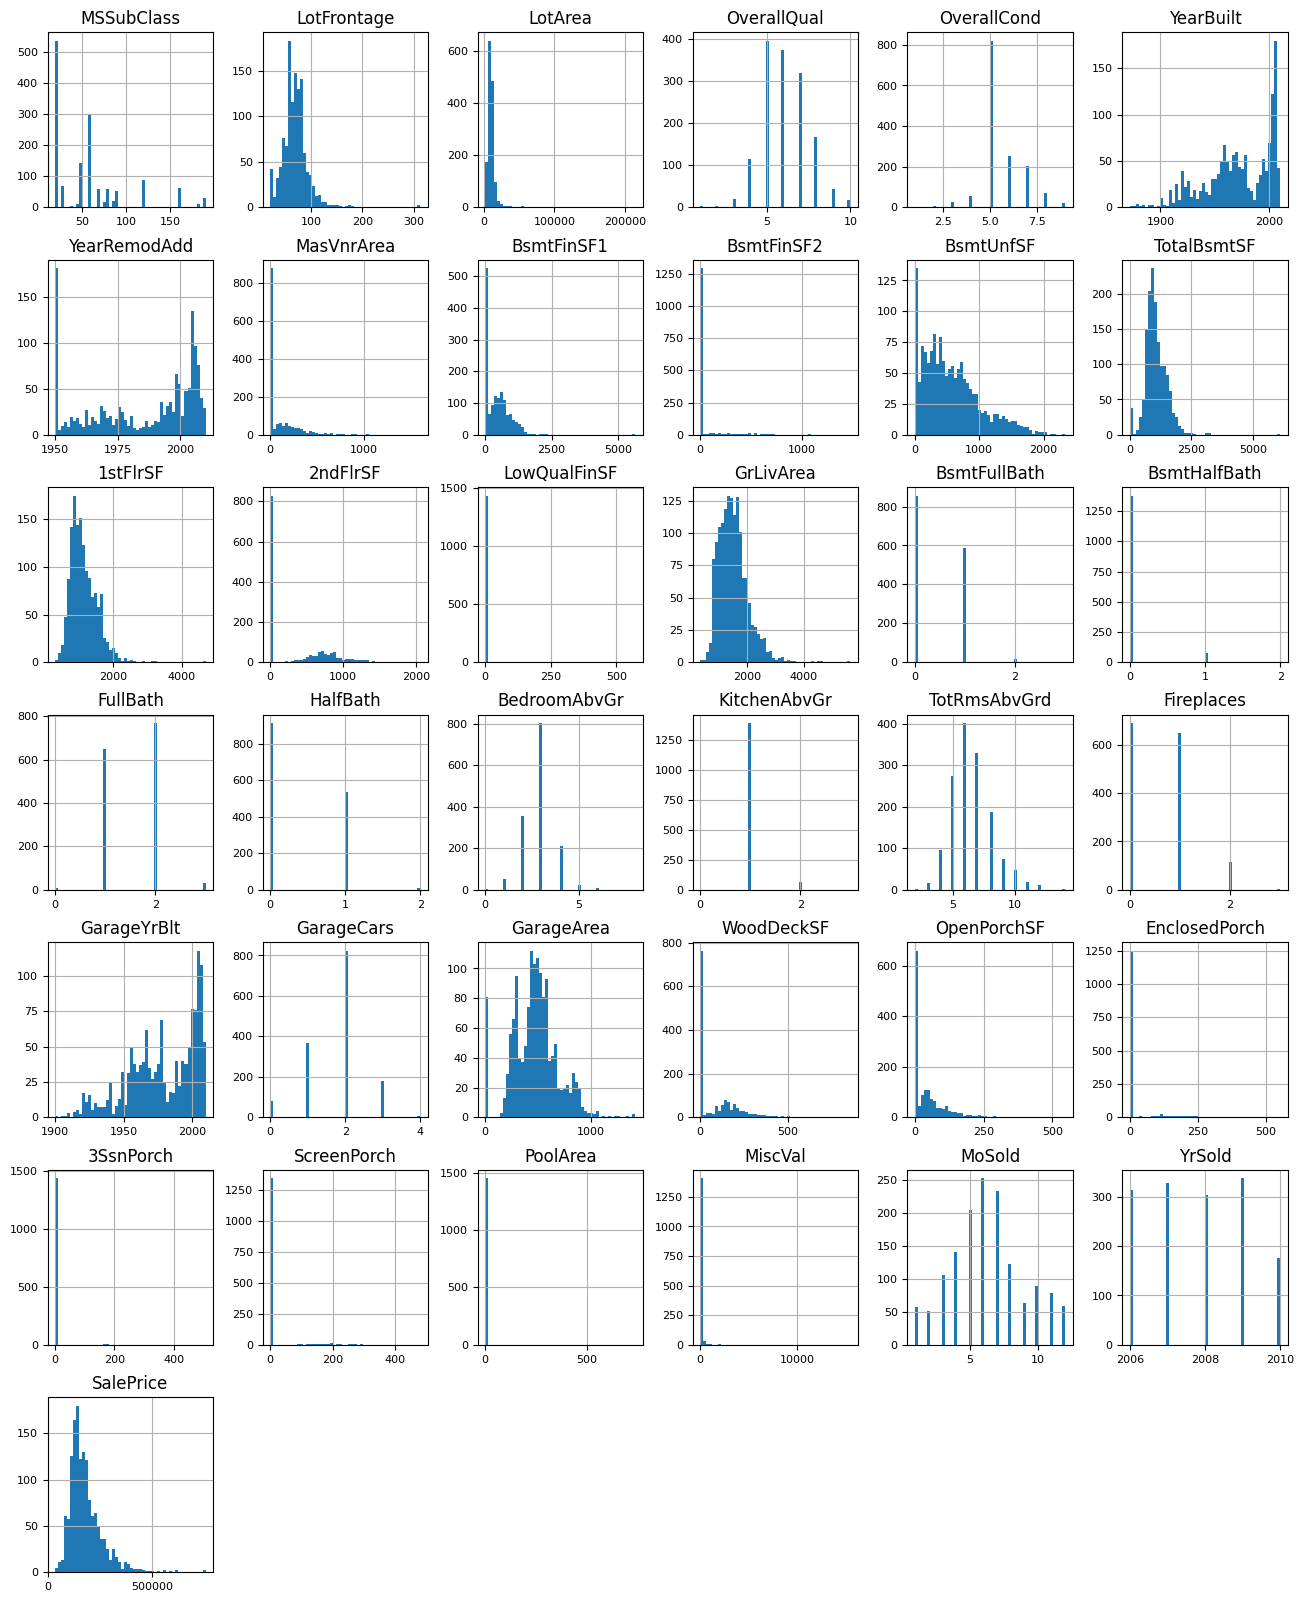

In [14]:
# plot all the data of each numeric feature data alone
numeric_features.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


## Preparing the Data


In [15]:
#functoin to split the data into a Trainig set and Validating "testing" set
def split_data(dataset, test_ratio=0.20):
    #Generates an array of random numbers between 0 and 1, 
    #with the length equal to the number of rows in dataset
    #Testing Data is stored in "test_indices" while test ratio is True <38%
    test_indices = np.random.rand(len(dataset)) < test_ratio 
    #Training set is 62% and Testing set is 38% of the dataset
    #[~test_indices]-> test_indices = False -> Training Data
    #[test_indices]-> test_indices = True -> Testing Data  
    return dataset[~test_indices], dataset[test_indices]
#calling the function and stroing the new split data sets
#"train_ds_pd" -> train dataset panda
train_ds_pd, valid_ds_pd = split_data(dataset_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

1156 examples in training, 304 examples in testing.


In [16]:
#Sets target variable which is "SalePrice"
label = "SalePrice"
#"tfdf" -> tensorflow_decision_forests library
#".pd_dataframe_to_tf_dataset" transforms the Panda Dataset format into TensorFlow Dataset format 
#"tfdf.keras.Task.REGRESSION" specifies the task to be solved as a regression problem (predicting continuous values) 
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

In [17]:
#show all momdels to select from 
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

## Train the model

In [18]:
#Create a Random Forest model 
#Task is regression
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
#MSE (Mean Squared Error) is a common metric used in regression problems. It calculates the average squared difference between predicted and actual values
rf.compile(metrics=["mse"]) # Optional, you can use this to include a list of eval metrics

Use /tmp/tmpj0x1qiaa as temporary training directory


In [19]:
#train the model 
#usual paramers are rf.fit(x=train_ds, y=train_labels, validation_data=(valid_ds, valid_labels), epochs=10)
#since our input data is train_ds it alreadt include features and lables which still keeps it supervised training
rf.fit(x=train_ds) 

Reading training dataset...
Training dataset read in 0:00:08.244219. Found 1156 examples.
Training model...


[INFO 24-10-06 17:54:32.6177 UTC kernel.cc:1233] Loading model from path /tmp/tmpj0x1qiaa/model/ with prefix 44f48bbf42104cfa


Model trained in 0:00:02.403291
Compiling model...


[INFO 24-10-06 17:54:33.0862 UTC decision_forest.cc:734] Model loaded with 300 root(s), 109768 node(s), and 74 input feature(s).
[INFO 24-10-06 17:54:33.0863 UTC abstract_model.cc:1362] Engine "RandomForestOptPred" built
[INFO 24-10-06 17:54:33.0864 UTC kernel.cc:1061] Use fast generic engine


Model compiled.


## Visualize the model


In [20]:
#Visualize the model
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

## Evaluate the Model

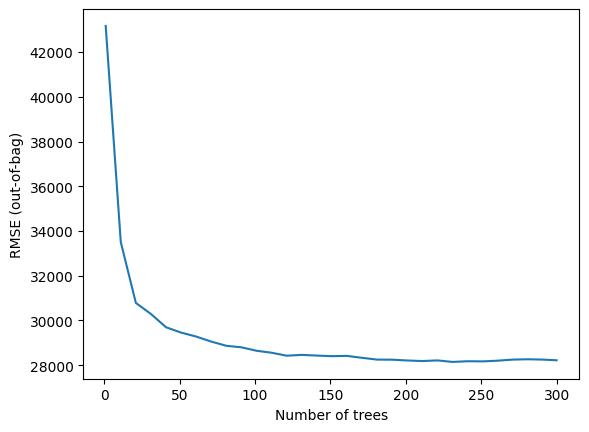

In [21]:
import matplotlib.pyplot as plt
#retrives the treaining logs from the Random Forest model
#Logs contain information about each stage of training, such as the number of trees and the RMSE (Root Mean Square Error).
logs = rf.make_inspector().training_logs()
# x-axis represents the number of tree, 
# y-axis represents the RMSE which measures the error between the predicted and actual values.
#RMSE is useful for understanding how the model’s accuracy evolves as more trees are added
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [22]:
##evaluate the performance of a Random Forest model
#make_inspector() create an inspector object 
inspector = rf.make_inspector()
#evaluation() returns the evaluation metrics of the trained model.
inspector.evaluation()

Evaluation(num_examples=1156, accuracy=None, loss=None, rmse=28217.93997093877, ndcg=None, aucs=None, auuc=None, qini=None)

In [23]:
#evaluate the model with the validation set
#return_dict=True argument specifies that the evaluation results should be returned as a dictionary
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")
# "mse" -> mean absolute error

1/1 [==============================] - 8s 8s/step - loss: 0.0000e+00 - mse: 1195493248.0000
loss: 0.0000
mse: 1195493248.0000


## Variable Importance

In [24]:
print(f"Available variable importances:")
#"inspector.variable_importances()" returns the different types of variable importance scores available from the model
#which calculate importance metrics as part of their training process.
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 NUM_NODES
	 SUM_SCORE
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT


In [25]:
#display the important features for the Variable Importance NUM_AS_ROOT
inspector.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #62), 102.0),
 ("ExterQual" (4; #22), 53.0),
 ("Neighborhood" (4; #59), 45.0),
 ("GarageCars" (1; #32), 31.0),
 ("KitchenQual" (4; #44), 20.0),
 ("GrLivArea" (1; #38), 16.0),
 ("YearBuilt" (1; #76), 14.0),
 ("TotalBsmtSF" (1; #73), 9.0),
 ("GarageArea" (1; #31), 5.0),
 ("BsmtQual" (4; #14), 2.0),
 ("FullBath" (1; #29), 1.0),
 ("GarageFinish" (4; #34), 1.0),
 ("GarageYrBlt" (1; #37), 1.0)]

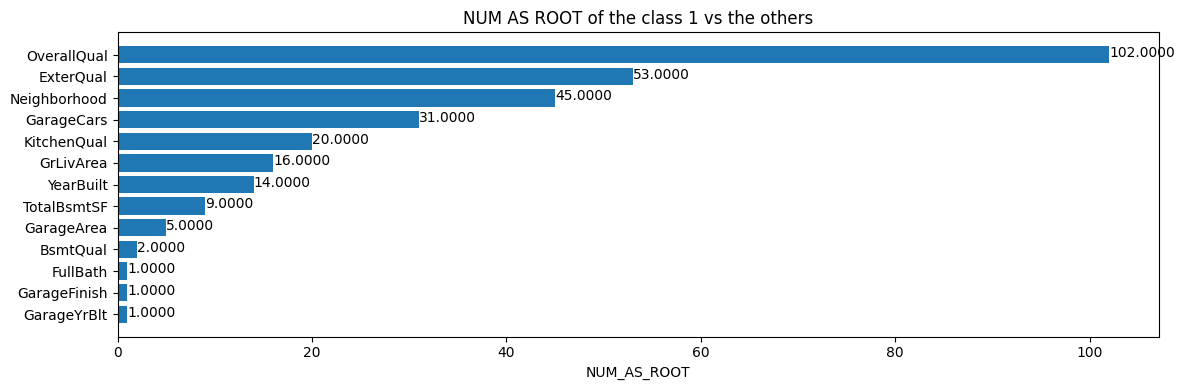

In [26]:
#plot the important features for the Variable Importance NUM_AS_ROOT for better visualization
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

In [29]:
## checkinf the prediction
#load Test data
test_file_path = "../input/house-prices-advanced-regression-techniques/test.csv"
test_data = pd.read_csv(test_file_path)
#remove Id column
ids = test_data.pop('Id')
#convert it to Tenserflow Dataset
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)
#make prediction for the "rf" trained dataset on the Test dataset
preds = rf.predict(test_ds)
#creata a Panda data frame to store prediction
# .squeeze() function is used to remove any unnecessary dimensions from preds (to ensure it's a flat array) 
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()

2/2 [==============================] - 0s 24ms/step


,Id,SalePrice
0,1461,127355.664062
1,1462,154261.375000
2,1463,173311.656250
3,1464,182672.156250
4,1465,195894.343750


In [30]:
#Setting up the submission file into an csv
sample_submission_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
sample_submission_df['SalePrice'] = rf.predict(test_ds)
sample_submission_df.to_csv('/kaggle/working/submission.csv', index=False)
sample_submission_df.head()

2/2 [==============================] - 0s 24ms/step


,Id,SalePrice
0,1461,127355.664062
1,1462,154261.375000
2,1463,173311.656250
3,1464,182672.156250
4,1465,195894.343750
